# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as st

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
#Primera forma
emp = employee.groupby('Department')['Salary'].mean()
emp

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
#Segunda forma
emp2= employee.pivot_table(index = 'Department', values= 'Salary', aggfunc='mean')
emp2

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
emp3= employee.pivot_table(index=['Department','Title'], values='Salary', aggfunc='mean')
emp3

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
emp4= employee.pivot_table(index= 'Title', values=['Salary', 'Years'], aggfunc='sum' )
emp4

,Salary,Years
Title,,
VP,140,16
analyst,130,9
associate,170,12


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [8]:
emp5= employee.pivot_table(index= 'Department' , columns= 'Title', 
                           values= ['Salary', 'Name'], 
                           aggfunc= {'Salary':'mean', 'Name': 'count'})
emp5

Name                   Salary                  
Title        VP analyst associate     VP analyst associate
Department                                                
HR          1.0     2.0       NaN   70.0    32.5       NaN
IT          1.0     2.0       1.0   70.0    32.5      60.0
Sales       NaN     NaN       2.0    NaN     NaN      55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [9]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [10]:
emp6= employee.pivot_table(index='Department', columns= 'Title', values= 'Salary', aggfunc= ['mean', 'min', 'max', 'std'])
emp6

mean                     min                     max          \
Title         VP analyst associate    VP analyst associate    VP analyst   
Department                                                                 
HR          70.0    32.5       NaN  70.0    30.0       NaN  70.0    35.0   
IT          70.0    32.5      60.0  70.0    30.0      60.0  70.0    35.0   
Sales        NaN     NaN      55.0   NaN     NaN      55.0   NaN     NaN   

                           std            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

Los resultados proporcionados en la tabla muestra el min, max, mean y std de los salarios para cada combinación de departamento y título. Veo representado NaN ya que esos valores nulos pueden ocurrir si no hay datos para todas las combinaciones posibles de 'Department' y 'Title' en la tabla original.

#### Based on your comments, fill the missing values with an appropriate value

In [11]:
#Voy a completar los missing values con la media(mean)
emp_nulos= emp6.fillna(emp6.mean())
emp_nulos

mean                     min                     max          \
Title         VP analyst associate    VP analyst associate    VP analyst   
Department                                                                 
HR          70.0    32.5      57.5  70.0    30.0      57.5  70.0    35.0   
IT          70.0    32.5      60.0  70.0    30.0      60.0  70.0    35.0   
Sales       70.0    32.5      55.0  70.0    30.0      55.0  70.0    35.0   

                           std            
Title      associate   analyst associate  
Department                                
HR              57.5  3.535534       0.0  
IT              60.0  3.535534       0.0  
Sales           55.0  3.535534       0.0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [12]:
emp7= employee.pivot_table(index='Department', values= ['Name', 'Salary'], aggfunc= {'Name':'count', 'Salary':'sum'})
emp7

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [13]:
#por cada departamento y titulo sacar el total de años de experiencia de trabajo y la mean salary
emp8= employee.pivot_table(index=['Department', 'Title'], values=['Years', 'Salary'], aggfunc={'Years':'sum', 'Salary':'mean'})
emp8

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [14]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [15]:
#hago la función:

def mean_without_max(salaries):
    max_salary = salaries.max()
    return salaries[salaries < max_salary].mean()

In [16]:
emp9= employee.pivot_table(index= 'Department', values = 'Salary', aggfunc= (mean_without_max))
emp9

,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [17]:
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [18]:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


In [19]:
#Calcular la correlación de toda la tabla:
fitbit.corr(numeric_only=True)

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [20]:
corr= fitbit['Minutes Very Active'].corr(fitbit['Steps'])
corr



0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

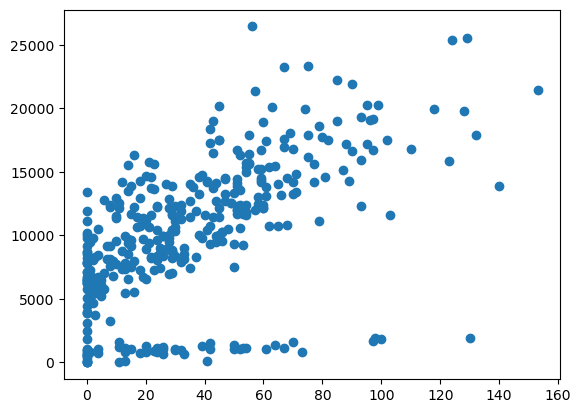

In [21]:
corr_visual= plt.scatter(x=fitbit['Minutes Very Active'], 
                         y=fitbit['Steps'])
corr_visual;

#### What can you say about Minute Very Active and Steps? Write a comment below

Observo que la correlación es moderada, es decir,  que las dos variables muestran una relación, pero no es tan fuerte. Los puntos tieneden a agruparse en una línea o una dirección específica.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [22]:
corr2 = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
corr2

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

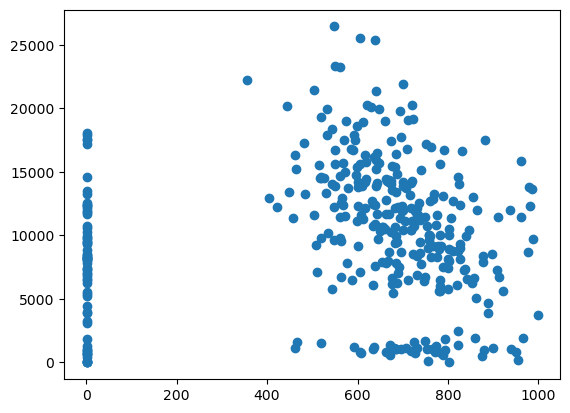

In [23]:
corr2_visual= plt.scatter(x=fitbit['Minutes Sedentary'], 
                          y=fitbit['Steps'])
corr2_visual;

La correlación que se observa entre 'Minutes Sedentary' Y 'Steps' es débil. Esto indica que estas dos variables tienen una relación no lineal. No hay una tendencia clara de aumento o disminución en una variable cuando la otra cambia.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [24]:
corr3= fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
corr3

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

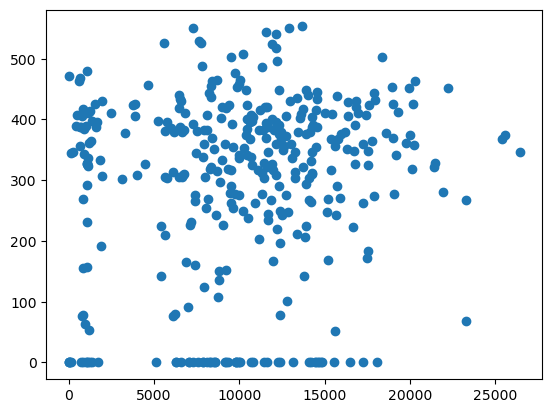

In [25]:
corr3_visual= plt.scatter(x=fitbit['Steps'],
                         y=fitbit['MinutesOfSleep'])
corr3_visual;

La correlación entre estas dos variables es débil, es decir, no tienen una relación lineal. 

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [38]:
#Primero selecciono un subconjunto del conjunto de datos fitbit:
fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


In [39]:
subfitbit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]

In [41]:
cor_fit = subfitbit.corr().T
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.946753,0.301791,0.481281,0.842210,0.458373
Steps,0.946753,1.000000,0.269902,0.197771,0.898183,0.413219
Floors,0.301791,0.269902,1.000000,0.446626,-0.093813,-0.506884
Minutes Sedentary,0.481281,0.197771,0.446626,1.000000,0.118437,-0.043432
Minutes Very Active,0.842210,0.898183,-0.093813,0.118437,1.000000,0.452993
MinutesOfSleep,0.458373,0.413219,-0.506884,-0.043432,0.452993,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [44]:
#Selecciono la fila correspondiente a la variable 'Steps'
highly_cor = cor_fit.loc['Steps']

In [46]:
#Ordeno los resultado en orden descendente
highly_cor_steps= highly_cor.sort_values(ascending=False)
highly_cor_steps

Steps                  1.000000
Calorie burned         0.946753
Minutes Very Active    0.898183
MinutesOfSleep         0.413219
Floors                 0.269902
Minutes Sedentary      0.197771
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [47]:
time_grades = pd.read_csv('Time_Grades.csv')

In [64]:
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


In [50]:
time_grades.shape

(15, 3)

#### Show visually the frequency distribution of the time_grades dataset.

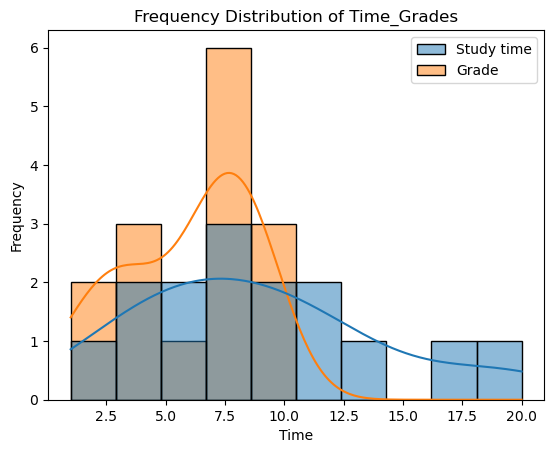

In [66]:
sns.histplot(time_grades, 
             bins=10, 
             kde=True, #util para mostra cómo se distribuyen los valores de 'time_grades' en bins y así obtener una representación visual de su distribución de freq.
             color='skyblue')

plt.title('Frequency Distribution of Time_Grades')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show();

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [76]:
#Opción Pearson:

cor_pearson = time_grades.corr(numeric_only=True, method= 'pearson')
cor_pearson

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


La matriz es simétrica, ya que la correlación 'Study Time' y 'Grade' es la misma en ambas direcciones. En particular, la matriz muestra:

- La correlación de Pearson entre "Study time" y "Study time" es 1. Esto es obvio, ya que la correlación de una variable consigo misma siempre es 1, lo que indica una correlación perfecta.

- La correlación de Pearson entre "Study time" y "Grade" es 0.798046.

- La correlación de Pearson entre "Grade" y "Grade" también es 1, nuevamente debido a la correlación perfecta de una variable consigo misma.

El valor de 0.798046 en la celda que representa la correlación entre "Study time" y "Grade" (y en su reflejo simétrico) indica una correlación positiva fuerte entre estas dos variables. Esto significa que, en general, a medida que la variable "Study time" aumenta, la variable "Grade" también tiende a aumentar. 

In [77]:
#Opción Spearman:

cor_spearman= time_grades.corr(numeric_only=True, method= 'spearman')
cor_spearman

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


A diferencia de la correlación de Pearson, no asume que la relación sea lineal.La fuerte correlación positiva en la matriz de correlación de Spearman indica una relación positiva entre el tiempo de estudio y las calificaciones en función del orden de los valores.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

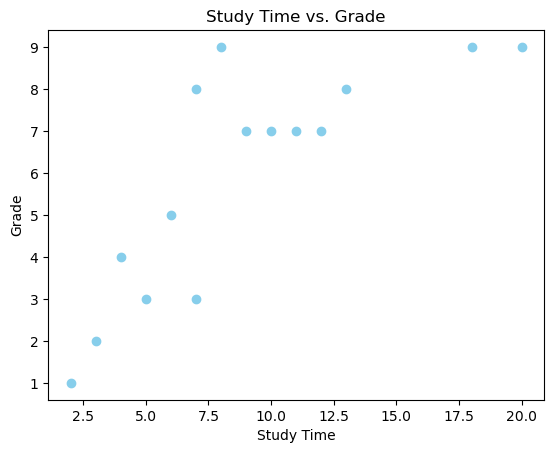

In [81]:
plt.scatter(x=time_grades['Study time'],
            y=time_grades['Grade'], 
            color='skyblue')

plt.title('Study Time VS Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.show();


Observo que la correlación es fuerte, es decir, siguen una relación lineal, sólida y positiva.La correlación se acerca a 1, lo que indica que a medida que aumenta el tiempo dedicado al estudio, las calificaciones tienden a ser más altas.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

La correlación de Pearson evalúa la relación lineal y es más adecuada para datos cuantitativos continuos que cumplen los supuestos, mientras que la correlación de Spearman evalúa la relación basada en el orden de los valores y es más robusta a los valores atípicos y a la falta de linealidad en los datos. La elección entre estas dos correlaciones depende de la naturaleza de tus datos y de lo que deseas medir.